In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [7]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [14]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')

title = soup.title

text = soup.get_text()

all_links = soup.find_all("a")

In [15]:
rows = soup.find_all('tr')


In [17]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)


[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [20]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, 1:41:18, 1:42:10, ]


In [35]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>|[\n\r]+')
    clean2 = (re.sub(clean, '',str_cells))
#     clean2 = clean2.strip()
    list_rows.append(clean2)
print(clean2)
type(clean2)


[577, 443,                     LIBBY B MITCHELL                , F, HILLSBORO, 1:41:18, 1:42:10, ]


str

In [42]:
list_rows = list_rows[1:]

In [43]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,"[Finishers:, 577]"
1,"[Male:, 414]"
2,"[Female:, 163]"
3,[]
4,"[1, 814, JARED WILSON ..."
5,"[2, 573, NATHAN A SUSTERSI..."
6,"[3, 687, FRANCISCO MAYA ..."
7,"[4, 623, PAUL MORROW ..."
8,"[5, 569, DEREK G OSBORNE ..."
9,"[6, 642, JONATHON TRAN ..."


In [44]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7
0,[Finishers:,577],None,None,None,None,None,None
1,[Male:,414],None,None,None,None,None,None
2,[Female:,163],None,None,None,None,None,None
3,[],None,None,None,None,None,None,None
4,[1,814,JARED WILSON,M,TIGARD,36:21,36:24,]
5,[2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,36:42,36:45,INTEL TEAM F ...
6,[3,687,FRANCISCO MAYA ...,M,PORTLAND,37:44,37:48,]
7,[4,623,PAUL MORROW,M,BEAVERTON,38:34,38:37,]
8,[5,569,DEREK G OSBORNE ...,M,HILLSBORO,39:21,39:24,INTEL TEAM F ...
9,[6,642,JONATHON TRAN ...,M,PORTLAND,39:49,39:55,]


In [55]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7
0,Finishers:,577],None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None
3,],None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,36:21,36:24,]
5,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,36:42,36:45,INTEL TEAM F ...
6,3,687,FRANCISCO MAYA ...,M,PORTLAND,37:44,37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,38:34,38:37,]
8,5,569,DEREK G OSBORNE ...,M,HILLSBORO,39:21,39:24,INTEL TEAM F ...
9,6,642,JONATHON TRAN ...,M,PORTLAND,39:49,39:55,]


In [39]:
col_labels = soup.find_all('th')


In [40]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)


['[Place, Bib, Name, Gender, City, Chip Time, Gun Time, Team]']


In [46]:
df2 = pd.DataFrame(all_header)
df2.head()


,0
0,"[Place, Bib, Name, Gender, City, Chip Time, Gu..."


In [47]:
df3 = df2[0].str.split(',', expand=True)
df3.head()


,0,1,2,3,4,5,6,7
0,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]


In [48]:
frames = [df3, df1]
df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7
0,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
0,Finishers:,577],None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None
3,],None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,36:21,36:24,]
5,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,36:42,36:45,INTEL TEAM F ...
6,3,687,FRANCISCO MAYA ...,M,PORTLAND,37:44,37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,38:34,38:37,]
8,5,569,DEREK G OSBORNE ...,M,HILLSBORO,39:21,39:24,INTEL TEAM F ...


In [49]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()


,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
0,Finishers:,577],None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None
3,],None,None,None,None,None,None,None


In [57]:
df5.info()
df5.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 580
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      582 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    Chip Time  578 non-null    object
 6    Gun Time   578 non-null    object
 7    Team]      578 non-null    object
dtypes: object(8)
memory usage: 40.9+ KB


(582, 8)

In [56]:
df6 = df5.dropna(axis=0, how='any')
df6.info()
df6.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 580
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      578 non-null    object
 1    Bib        578 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    Chip Time  578 non-null    object
 6    Gun Time   578 non-null    object
 7    Team]      578 non-null    object
dtypes: object(8)
memory usage: 40.6+ KB


(578, 8)

In [58]:
df7 = df6.drop(df6.index[0])
df7.head()


,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
4,1,814,JARED WILSON,M,TIGARD,36:21,36:24,]
5,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,36:42,36:45,INTEL TEAM F ...
6,3,687,FRANCISCO MAYA ...,M,PORTLAND,37:44,37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,38:34,38:37,]
8,5,569,DEREK G OSBORNE ...,M,HILLSBORO,39:21,39:24,INTEL TEAM F ...


In [68]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()


,Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,36:21,36:24,]
5,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,36:42,36:45,INTEL TEAM F ...
6,3,687,FRANCISCO MAYA ...,M,PORTLAND,37:44,37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,38:34,38:37,]
8,5,569,DEREK G OSBORNE ...,M,HILLSBORO,39:21,39:24,INTEL TEAM F ...


In [70]:
df7['Team'] = df7['Team'].str.strip(']')
df7.tail()


,Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team
576,573,273,RACHEL L VANEY ...,F,OTHER,1:38:17,1:38:34,
577,574,467,ROHIT B DSOUZA ...,M,PORTLAND,1:38:31,1:40:32,INTEL TEAM I ...
578,575,471,CENITA D'SOUZA ...,F,PORTLAND,1:38:32,1:40:34,
579,576,338,PRANAVI APPANA ...,F,HILLSBORO,1:40:47,1:42:01,
580,577,443,LIBBY B MITCHELL ...,F,HILLSBORO,1:41:18,1:42:10,


In [76]:
time_list = df7[' Chip Time'].tolist()
time_mins = []
for i in time_list:
    i_split = i.split(':')
    if len(i_split) == 3:
        h, m, s = i_split
    else:
        h = 0
        m, s = i_split
    time_math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    
    time_mins.append(time_math)



In [77]:
df7['Runner_mins'] = time_mins
df7.head()


,Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team,Runner_mins
4,1,814,JARED WILSON,M,TIGARD,36:21,36:24,,36.350000
5,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,36:42,36:45,INTEL TEAM F ...,36.700000
6,3,687,FRANCISCO MAYA ...,M,PORTLAND,37:44,37:48,,37.733333
7,4,623,PAUL MORROW,M,BEAVERTON,38:34,38:37,,38.566667
8,5,569,DEREK G OSBORNE ...,M,HILLSBORO,39:21,39:24,INTEL TEAM F ...,39.350000


In [85]:
df7.describe(include=[np.number])


,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


([<matplotlib.axis.XTick at 0x7f8c982dde20>], [Text(1, 0, 'Runners')])

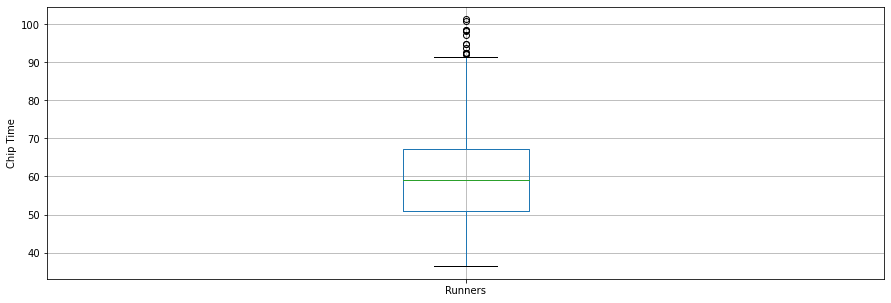

In [86]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
 
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

/Users/prabhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


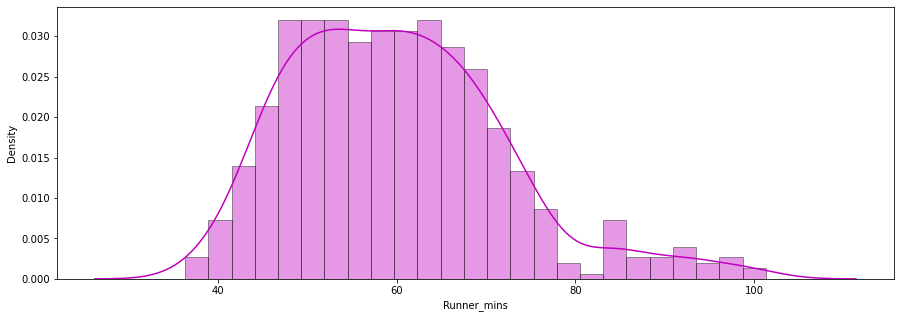

In [87]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()


/Users/prabhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prabhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


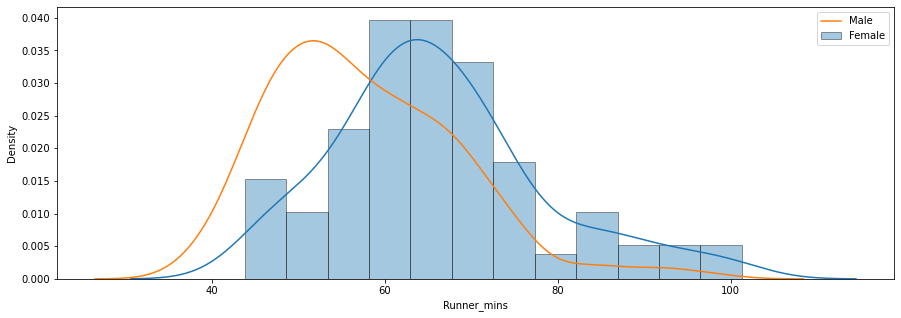

In [90]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()


In [91]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)


        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


Text(0.5, 0.98, '')

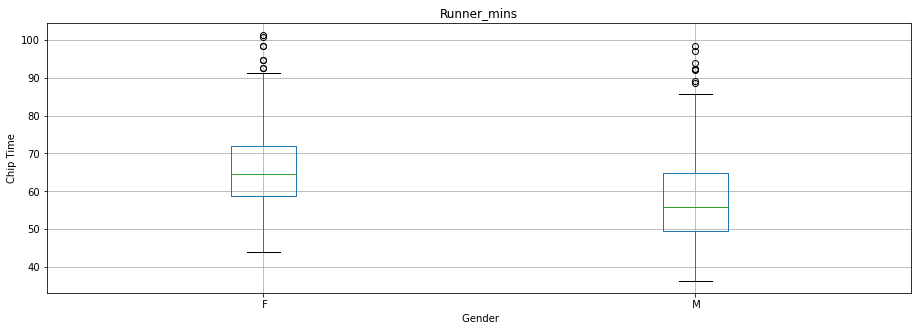

In [92]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")